# Google Earth Engine Component

## Initialize

In [1]:
#Import required libraries
import ee
import geemap
import math

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Initialize Google Earth Engine
#ee.Authenticate() just needed the 1st time
ee.Initialize()

In [3]:
# Check if geemap is working as intended - plot the leaflet map
Map = geemap.Map()

## Load Feature Collection - Shapefiles

In [4]:
#Data loads

#loads feature collection data from Google Earth Engine - We can also upload other feature collections
counties = ee.FeatureCollection("TIGER/2018/Counties")

#filter LA County
la_county = counties.filter(ee.Filter.eq('NAME', 'Los Angeles'))

In [5]:
#loads cities data - Not in current use

#load California Cities Shapefile
cities = ee.FeatureCollection("projects/california-lawn-detection/assets/Cities2015")

# Filter for LA City
la_cities = cities.filter(ee.Filter.eq('County', 'Los Angeles'))

# Filter sea
la_cities_land = la_cities.filter(ee.Filter.notEquals('Notes', '3 nautical mile offshore'))

# How to add a layer to the base map
Map.addLayer(la_cities_land,{}, 'la_cities')

In [6]:
#loads parcel data

la_parcel_shape = ee.FeatureCollection("projects/california-lawn-detection/assets/LA_County_Parcels_Shape")

# Map.addLayer(la_parcel_shape,{'color': '00000000'}, 'la_parcel_shape')

In [7]:
#Income Data

la_county_income = ee.FeatureCollection("projects/california-lawn-detection/assets/lacountyincome-final")

Map.addLayer(la_county_income,{}, 'LA County Income')

In [8]:
la_county_income2 = ee.FeatureCollection("projects/california-lawn-detection/assets/lacountyincome_update")
la_county_income = la_county_income2.select(ee.List(['Name', 'Descriptio', 'Ranking']), ee.List(['Name', 'Median_Income', 'Ranking']))
Map.addLayer(la_county_income,{}, 'LA County Income')

In [9]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

## Load NAIP Imagery

In [10]:
#loads NAIP 2020 and 2010 dataset and selects bands Red, Green, Blue, Near Infrared (R,G,B,N)

# rgbn imagery from 2010 to 2020
image_2020_rgbn = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2020-01-01', '2020-12-31')
    .select(['R', 'G', 'B', 'N'])
)

image_2018_rgbn = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2018-01-01', '2018-12-31')
    .select(['R', 'G', 'B', 'N'])
)

image_2016_rgbn = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2016-01-01', '2016-12-31')
    .select(['R', 'G', 'B', 'N'])
)

image_2014_rgbn = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2014-01-01', '2014-12-31')
    .select(['R', 'G', 'B', 'N'])
)

image_2012_rgbn = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2012-01-01', '2012-12-31')
    .select(['R', 'G', 'B', 'N'])
)

image_2010_rgbn = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2010-01-01', '2010-12-31')
    .select(['R', 'G', 'B', 'N'])
)

# nrg imagery from 2010 to 2020
image_2020_nrg = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2020-01-01', '2020-12-31')
    .select(['N','R','G'])
)

image_2018_nrg = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2018-01-01', '2018-12-31')
    .select(['N','R','G'])
)

image_2016_nrg = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2016-01-01', '2016-12-31')
    .select(['N','R','G'])
)

image_2014_nrg = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2014-01-01', '2014-12-31')
    .select(['N','R','G'])
)

image_2012_nrg = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2012-01-01', '2012-12-31')
    .select(['N','R','G'])
)

image_2010_nrg = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterDate('2010-01-01', '2010-12-31')
    .select(['N','R','G'])
)

#Calculate median so it can be clipped - turns image collection into an image
NAIP_2020_rgbn = image_2020_rgbn.median()
NAIP_2018_rgbn = image_2018_rgbn.median()
NAIP_2016_rgbn = image_2016_rgbn.median()
NAIP_2014_rgbn = image_2014_rgbn.median()
NAIP_2012_rgbn = image_2012_rgbn.median()
NAIP_2010_rgbn = image_2010_rgbn.median()

NAIP_2020_nrg = image_2020_nrg.median()
NAIP_2018_nrg = image_2018_nrg.median()
NAIP_2016_nrg = image_2016_nrg.median()
NAIP_2014_nrg = image_2014_nrg.median()
NAIP_2012_nrg = image_2012_nrg.median()
NAIP_2010_nrg = image_2010_nrg.median()

#Clip images to desired polygon in this case la_county

NAIP_2020_rgbn_lacounty = NAIP_2020_rgbn.clip(la_county)
NAIP_2020_nrg_lacounty = NAIP_2020_nrg.clip(la_county)
NAIP_2018_rgbn_lacounty = NAIP_2018_rgbn.clip(la_county)
NAIP_2018_nrg_lacounty = NAIP_2018_nrg.clip(la_county)
NAIP_2016_rgbn_lacounty = NAIP_2016_rgbn.clip(la_county)
NAIP_2016_nrg_lacounty = NAIP_2016_nrg.clip(la_county)
NAIP_2014_rgbn_lacounty = NAIP_2014_rgbn.clip(la_county)
NAIP_2014_nrg_lacounty = NAIP_2014_nrg.clip(la_county)
NAIP_2012_rgbn_lacounty = NAIP_2012_rgbn.clip(la_county)
NAIP_2012_nrg_lacounty = NAIP_2012_nrg.clip(la_county)
NAIP_2010_rgbn_lacounty = NAIP_2010_rgbn.clip(la_county)
NAIP_2010_nrg_lacounty = NAIP_2010_nrg.clip(la_county)

In [11]:
NAIP_2020_rgbn_lacounty

In [12]:
#Calculate NDVI for each image
ndvi_2020 = NAIP_2020_rgbn_lacounty.normalizedDifference(['N', 'R']).rename('NAIP_2020_NDVI')
ndvi_2018 = NAIP_2018_rgbn_lacounty.normalizedDifference(['N', 'R']).rename('NAIP_2018_NDVI')
ndvi_2016 = NAIP_2016_rgbn_lacounty.normalizedDifference(['N', 'R']).rename('NAIP_2016_NDVI')
ndvi_2014 = NAIP_2014_rgbn_lacounty.normalizedDifference(['N', 'R']).rename('NAIP_2014_NDVI')
ndvi_2012 = NAIP_2012_rgbn_lacounty.normalizedDifference(['N', 'R']).rename('NAIP_2012_NDVI')
ndvi_2010 = NAIP_2010_rgbn_lacounty.normalizedDifference(['N', 'R']).rename('NAIP_2010_NDVI')

In [13]:
#Add it as a layer
Map.addLayer(ndvi_2020, {min : -1, max : 1, 'palette' : ['blue', 'white', 'green']}, 'NAIP_2020_NDVI')

# 2018
# Map.addLayer(ndvi_2018, {min : -1, max : 1, 'palette' : ['blue', 'white', 'green']}, 'NAIP_2018_NDVI')

# 2016
# Map.addLayer(ndvi_2016, {min : -1, max : 1, 'palette' : ['blue', 'white', 'green']}, 'NAIP_2016_NDVI')

# 2014
# Map.addLayer(ndvi_2014, {min : -1, max : 1, 'palette' : ['blue', 'white', 'green']}, 'NAIP_2014_NDVI')

# 2012
# Map.addLayer(ndvi_2012, {min : -1, max : 1, 'palette' : ['blue', 'white', 'green']}, 'NAIP_2012_NDVI')

# 2010
# Map.addLayer(ndvi_2010, {min : -1, max : 1, 'palette' : ['blue', 'white', 'green']}, 'NAIP_2010_NDVI')

In [40]:
#Add layer
Map.addLayer(NAIP_2020_rgbn_lacounty,{}, 'NAIP_2020_rgbn')
Map.addLayer(NAIP_2020_nrg_lacounty,{}, 'NAIP_2020_nrg')

#2018
#Map.addLayer(NAIP_2018_rgbn_lacounty,{}, 'NAIP_2018_rgbn')
#Map.addLayer(NAIP_2018_nrg_lacounty,{}, 'NAIP_2018_nrg')

#2016
#Map.addLayer(NAIP_2016_rgbn_lacounty,{}, 'NAIP_2016_rgbn')
#Map.addLayer(NAIP_2016_nrg_lacounty,{}, 'NAIP_2016_nrg')

#2014
#Map.addLayer(NAIP_2014_rgbn_lacounty,{}, 'NAIP_2014_rgbn')
#Map.addLayer(NAIP_2014_nrg_lacounty,{}, 'NAIP_2014_nrg')

#2012
#Map.addLayer(NAIP_2012_rgbn_lacounty,{}, 'NAIP_2012_rgbn')
#Map.addLayer(NAIP_2012_nrg_lacounty,{}, 'NAIP_2012_nrg')

#2010
#Map.addLayer(NAIP_2010_rgbn_lacounty,{}, 'NAIP_2010_rgbn')
#Map.addLayer(NAIP_2010_nrg_lacounty,{}, 'NAIP_2010_nrg')

In [42]:
NAIP_2020_rgbn_lacounty.bandNames().getInfo()

['R',
 'G',
 'B',
 'N',
 'R_Entropy',
 'R_Contrast',
 'R_Gearys',
 'G_Entropy',
 'G_Contrast',
 'G_Gearys',
 'B_Entropy',
 'B_Contrast',
 'B_Gearys',
 'N_Entropy',
 'N_Contrast',
 'N_Gearys']

In [41]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

## Texture

In [15]:
def neighborhood_bands(image, band):
    i_8_bit = image.select(band).toUint8()
    square = ee.Kernel.square(**{'radius': 4})
    entropy = i_8_bit.entropy(square)
    glcm = i_8_bit.glcmTexture(**{'size': 4})
    contrast = glcm.select(str(band)+'_contrast')
    
    # Create a list of weights for a 9x9 kernel.
    list = [1, 1, 1, 1, 1, 1, 1, 1, 1]
    # The center of the kernel is zero.
    centerList = [1, 1, 1, 1, 0, 1, 1, 1, 1]
    # Assemble a list of lists: the 9x9 kernel weights as a 2-D matrix.
    lists = [list, list, list, list, centerList, list, list, list, list]
    # Create the kernel from the weights.
    # Non-zero weights represent the spatial neighborhood.
    kernel = ee.Kernel.fixed(9, 9, lists, -4, -4, False)
    neighs = i_8_bit.neighborhoodToBands(kernel)
    gearys = i_8_bit.subtract(neighs).pow(2).reduce(ee.Reducer.sum()).divide(math.pow(9, 2))
    image = image.addBands(entropy.rename(str(band)+'_Entropy')).addBands(contrast.rename(str(band)+'_Contrast')).addBands(gearys.rename(str(band)+'_Gearys'))   
    return image


In [16]:
bands = ['R', 'G', 'B', 'N']
for band in bands:
    NAIP_2020_rgbn_lacounty = neighborhood_bands(NAIP_2020_rgbn_lacounty,band)

In [17]:
NAIP_2020_rgbn_lacounty.bandNames().getInfo()

['R',
 'G',
 'B',
 'N',
 'R_Entropy',
 'R_Contrast',
 'R_Gearys',
 'G_Entropy',
 'G_Contrast',
 'G_Gearys',
 'B_Entropy',
 'B_Contrast',
 'B_Gearys',
 'N_Entropy',
 'N_Contrast',
 'N_Gearys']

In [18]:
def add_NDVI(image):
    image = image.addBands(image.normalizedDifference(['N','R']).rename('NDVI'))
    return image

In [19]:
NAIP_2020_rgbn_ndvi_lacounty = add_NDVI(NAIP_2020_rgbn_lacounty)
#NAIP_2018_rgbn_ndvi_lacounty = add_NDVI(NAIP_2018_rgbn_lacounty)
#NAIP_2016_rgbn_ndvi_lacounty = add_NDVI(NAIP_2016_rgbn_lacounty)
#NAIP_2014_rgbn_ndvi_lacounty = add_NDVI(NAIP_2014_rgbn_lacounty)
#NAIP_2012_rgbn_ndvi_lacounty = add_NDVI(NAIP_2012_rgbn_lacounty)
#NAIP_2010_rgbn_ndvi_lacounty = add_NDVI(NAIP_2010_rgbn_lacounty)

In [20]:
NAIP_2020_rgbn_ndvi_lacounty.bandNames().getInfo()

['R',
 'G',
 'B',
 'N',
 'R_Entropy',
 'R_Contrast',
 'R_Gearys',
 'G_Entropy',
 'G_Contrast',
 'G_Gearys',
 'B_Entropy',
 'B_Contrast',
 'B_Gearys',
 'N_Entropy',
 'N_Contrast',
 'N_Gearys',
 'NDVI']

In [45]:
Map.addLayer(NAIP_2020_rgbn_ndvi_lacounty,{}, 'NDVI_2020_rgbn')

In [46]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

## Load Labeled Data

In [21]:
## Loading feature collections from Google Earth Engine

#water = ee.FeatureCollection("projects/california-lawn-detection/assets/water_torrance")
water = ee.FeatureCollection("projects/california-lawn-detection/assets/water_torrance_0610")
vegetation_trees = ee.FeatureCollection("projects/california-lawn-detection/assets/trees_torrance")
vegetation_grass = ee.FeatureCollection("projects/california-lawn-detection/assets/grass_torrance").limit(400)
turf_1 = ee.FeatureCollection("projects/california-lawn-detection/assets/turf_torrance1")
turf_2 = ee.FeatureCollection("projects/california-lawn-detection/assets/turf_torrance2")
pv = ee.FeatureCollection("projects/california-lawn-detection/assets/pv_torrance")
impervious_1 = ee.FeatureCollection("projects/california-lawn-detection/assets/impervious_torrance1").limit(40)
impervious_2 = ee.FeatureCollection("projects/california-lawn-detection/assets/impervious_torrance2").limit(40)
soil = ee.FeatureCollection("projects/california-lawn-detection/assets/soil_torrance").limit(40)

turf = turf_1.merge(turf_2)

impervious= impervious_1.merge(impervious_2)

#full labeled
#labeled_set = water.merge(vegetation_trees).merge(vegetation_grass).merge(turf).merge(pv).merge(impervious).merge(soil)

#no soil
#labeled_set = water.merge(vegetation_trees).merge(vegetation_grass).merge(turf).merge(pv).merge(impervious)

#no pv
labeled_set = water.merge(vegetation_trees).merge(vegetation_grass).merge(turf).merge(impervious).merge(soil)

Map.addLayer(labeled_set, {}, 'labeled_set')

In [22]:
Map

Map(bottom=754.0, center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(…

In [23]:
def training_area(image, training_class):
    
    area = image.reduceRegion(
    reducer = ee.Reducer.count(), 
    geometry = training_class.geometry(), 
    scale = 2, 
    maxPixels = 1e13)

    return(area.getInfo().get('B'))

In [24]:
def training_polygons(training_class):
    return(training_class.aggregate_count('label').getInfo())

In [25]:
# training information
training_classes_list = [water,
                         vegetation_trees,
                         vegetation_grass,
                         turf,
                         pv,
                         impervious,
                         soil]

training_classes_list_text = ['water',
                              'vegetation_trees',
                              'vegetation_grass',
                              'turf',
                              'pv',
                              'impervious',
                              'soil']
n = 0
for i in training_classes_list:
    area_i = training_area(NAIP_2020_rgbn_ndvi_lacounty, i)
    polygons_i = training_polygons(i)
    print(training_classes_list_text[n],"pixels:", area_i ,", polygons", polygons_i)
    n += 1

water pixels: 486 , polygons 199
vegetation_trees pixels: 17125 , polygons 772
vegetation_grass pixels: 23681 , polygons 400
turf pixels: 857 , polygons 215
pv pixels: 1723 , polygons 344
impervious pixels: 20360 , polygons 80
soil pixels: 8761 , polygons 40


## Building Training Set

In [26]:
# Overlay the points on the imagery to get training.
label = 'landcover'
bands = ['R', 'G', 'B', 'N', 'NDVI',
         'R_Entropy',
         'R_Contrast',
         'R_Gearys',
         'G_Entropy',
         'G_Contrast',
         'G_Gearys',
         'B_Entropy',
         'B_Contrast',
         'B_Gearys',
         'N_Entropy', 
         'N_Contrast', 
         'N_Gearys']

training2020 = NAIP_2020_rgbn_ndvi_lacounty.select(bands).sampleRegions(**{
  'collection': labeled_set,
  'properties': [label],
  'scale': 1
})

In [27]:
print("Labeled Set Size in Pixels", training2020.aggregate_count('R').getInfo())

Labeled Set Size in Pixels 284710


In [47]:
#Split Training and Test Set Randomly - there might be a better way to do this

sample = training2020
sample = sample.randomColumn()
trainingSample = sample.filter('random <= 0.8')
validationSample = sample.filter('random > 0.8')


In [48]:
print("Training Set Size in Pixels", trainingSample.aggregate_count('R').getInfo())

Training Set Size in Pixels 227871


In [49]:
print("Test Set Size in Pixels", validationSample.aggregate_count('R').getInfo())

Test Set Size in Pixels 56839


### Machine Learning Model

In [31]:
trained2020 = ee.Classifier.smileRandomForest(numberOfTrees = 100).train(trainingSample, label, bands)

In [62]:
trained2020

In [71]:
classified2020 = NAIP_2020_rgbn_ndvi_lacounty.classify(trained2020)

In [72]:
NAIP_2020_rgbn_ndvi_lacounty.select(bands)

In [73]:
#full
#legend_keys = ['water', 'vegetation_trees', 'vegetation_grass', 'turf','pv','impervious','soil']
#legend_colors = ['#0B6AEF', '#097407', '#0CE708', '#8C46D2','#F7EF02' ,' #A1A8AF','#D47911']

#no soil
#legend_keys = ['water', 'vegetation_trees', 'vegetation_grass', 'turf','pv','impervious']
#legend_colors = ['#0B6AEF', '#097407', '#0CE708', '#8C46D2','#F7EF02' ,' #A1A8AF']

#no pv
legend_keys = ['water', 'vegetation_trees', 'vegetation_grass', 'turf','impervious','soil']
legend_colors = ['#0B6AEF', '#097407', '#0CE708', '#8C46D2' ,' #A1A8AF','#D47911']

Map.addLayer(classified2020, {'min': 1, 'max': 7, 'palette': legend_colors}, 'Classification2020')


# Map.add_legend(
#     legend_keys=legend_keys, legend_colors=legend_colors, position='bottomright'
# )

In [74]:
Map

Map(bottom=209216.0, center=[34.29579932143427, -118.4480667114258], controls=(WidgetControl(options=['positio…

## Evaluation Metrics

In [34]:
train_accuracy = trained2020.confusionMatrix()
train_accuracy.getInfo()

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1473, 0, 0, 0, 0, 0, 0],
 [0, 0, 54687, 22, 0, 0, 0, 0],
 [0, 0, 136, 75610, 0, 0, 3, 1],
 [0, 0, 0, 0, 2638, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 65382, 0],
 [0, 0, 0, 0, 0, 0, 2, 27917]]

In [35]:
train_accuracy.accuracy().getInfo()

0.9992802945526197

In [36]:
train_accuracy.kappa().getInfo()

0.9990199881422369

In [37]:
test_accuracy = trained2020.confusionMatrix()
train_accuracy.getInfo()

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1473, 0, 0, 0, 0, 0, 0],
 [0, 0, 54687, 22, 0, 0, 0, 0],
 [0, 0, 136, 75610, 0, 0, 3, 1],
 [0, 0, 0, 0, 2638, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 65382, 0],
 [0, 0, 0, 0, 0, 0, 2, 27917]]

### Test Accuracy

In [56]:
validated = validationSample.classify(trained2020)

In [57]:
test_accuracy = validated.errorMatrix('landcover', 'classification')

In [58]:
test_accuracy.getInfo()

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 393, 0, 0, 1, 0, 0, 0],
 [0, 0, 13324, 363, 2, 0, 10, 5],
 [0, 0, 692, 18259, 3, 0, 22, 15],
 [0, 0, 29, 2, 606, 0, 15, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 4, 0, 16078, 11],
 [0, 0, 2, 26, 0, 0, 10, 6964]]

In [59]:
test_accuracy.accuracy().getInfo()

0.9786238322278717

In [61]:
# test_accuracy.kappa().getInfo()

## Binary Classification and Area Calculation

In [43]:
def area_calculation(image, class_number, shape, pixel_scale):
    
    areaImage = image.eq(class_number).multiply(ee.Image.pixelArea())
    
    area = areaImage.reduceRegion(
        reducer = ee.Reducer.sum(), 
        geometry = shape.geometry(), 
        scale = pixel_scale, 
        maxPixels = 1e13)
    
    area_sq_m = area.getInfo().get('classification')
    
    area_sq_km = area_sq_m / 1e6
    
    return area_sq_km

In [44]:
water_area = area_calculation(classified2020, 1, la_county, 20)
vegetation_trees_area = area_calculation(classified2020, 2, la_county, 20)
vegetation_grass_area = area_calculation(classified2020, 3, la_county, 20)
turf_area = area_calculation(classified2020, 4, la_county, 20)
impervious_area = area_calculation(classified2020, 6, la_county, 20)
soil_area = area_calculation(classified2020, 7, la_county, 20)

total_area = water_area + vegetation_trees_area + vegetation_grass_area + turf_area + impervious_area + soil_area

water_percentage = water_area / total_area
vegetation_trees_percentage = vegetation_trees_area / total_area
vegetation_grass_percentage = vegetation_grass_area / total_area
turf_percentage = turf_area / total_area
impervious_percentage = impervious_area / total_area
soil_percentage = soil_area / total_area

## Image to Array (In progress)

In [74]:
# image_array = classified2020.toArray()
image_array= NAIP_2020_rgbn

In [75]:
image_array

In [118]:
aoi = ee.Geometry.Polygon(
  [[[-118.4,34.0],
[-118.4,34.1],
[-118.3,34.1],
[-118.3,34.0]]])

In [119]:
band_arrs=image_array.sampleRectangle(region=aoi)

In [126]:
band_arr_b = band_arrs.get('G')

In [127]:
np_arr_b = np.array(band_arr_b.getInfo())

In [128]:
np_arr_b.shape

(1, 1)

(373, 531)
(373, 531)
(373, 531)
(373, 531, 1)
(373, 531, 1)
(373, 531, 1)
(373, 531, 3)


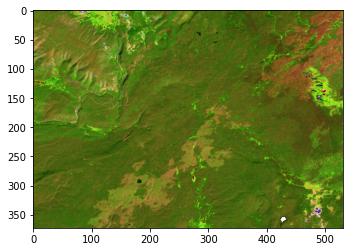

In [131]:
# Define an image.
img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810') \
  .select(['B4', 'B5', 'B6'])

# Define an area of interest.
aoi = ee.Geometry.Polygon(
  [[[-110.8, 44.7],
    [-110.8, 44.6],
    [-110.6, 44.6],
    [-110.6, 44.7]]], None, False)

# Get 2-d pixel array for AOI - returns feature with 2-D pixel array as property per band.
band_arrs = img.sampleRectangle(region=aoi)

# Get individual band arrays.
band_arr_b4 = band_arrs.get('B4')
band_arr_b5 = band_arrs.get('B5')
band_arr_b6 = band_arrs.get('B6')

# Transfer the arrays from server to client and cast as np array.
np_arr_b4 = np.array(band_arr_b4.getInfo())
np_arr_b5 = np.array(band_arr_b5.getInfo())
np_arr_b6 = np.array(band_arr_b6.getInfo())
print(np_arr_b4.shape)
print(np_arr_b5.shape)
print(np_arr_b6.shape)

# Expand the dimensions of the images so they can be concatenated into 3-D.
np_arr_b4 = np.expand_dims(np_arr_b4, 2)
np_arr_b5 = np.expand_dims(np_arr_b5, 2)
np_arr_b6 = np.expand_dims(np_arr_b6, 2)
print(np_arr_b4.shape)
print(np_arr_b5.shape)
print(np_arr_b6.shape)

# Stack the individual bands to make a 3-D array.
rgb_img = np.concatenate((np_arr_b6, np_arr_b5, np_arr_b4), 2)
print(rgb_img.shape)

# Scale the data to [0, 255] to show as an RGB image.
rgb_img_test = (255*((rgb_img - 100)/3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

In [103]:
combined_img = ee.ImageCollection([img_1, img_2]).mosaic()